In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.lines as mlines
import pandas as pd
import string

warnings.filterwarnings('ignore')

font_size = 17
rcParams['axes.titlesize'] = font_size
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [2]:
# area_dir = '../data/calibration/landfill_ensemble_co2/'
point_dir = '../data/calibration/point_ensemble_co2/'

## Read data

In [3]:
def read_csv(data_dir, loc_name, instrument='EMIT', emiss_type='area', emiss_limit='05kt', wind='u10'):
    if instrument == 'EMIT':
        res = '50m'
    else:
        res = '25m'

    if len(emiss_limit) > 0:
        df_source = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_source.csv')
        df_plume = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume.csv')
        df_domain = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_newcsf.csv')
        df_crop_source = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_source_2500m.csv')
        df_crop_plume = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume_2500m.csv')
        df_crop_domain = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_2500m.csv')
        df_crop_source_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_source_1000m.csv')
        df_crop_plume_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume_1000m.csv')
        df_crop_domain_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{emiss_limit}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_1000m.csv')
    else:
        df_source = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_source.csv')
        df_plume = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume.csv')
        df_domain = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_newcsf.csv')
        df_crop_source = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_source_2500m.csv')
        df_crop_plume = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume_2500m.csv')
        df_crop_domain = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_2500m.csv')
        df_crop_source_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_source_1000m.csv')
        df_crop_plume_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_inplume_1000m.csv')
        df_crop_domain_1000 = pd.read_csv(f'{data_dir}/delta_xco2_{emiss_type}_{res}_{instrument}_{loc_name}_denoise_{wind}_all_1000m.csv')

    return [df_source, df_plume, df_domain, df_crop_source, df_crop_plume, df_crop_domain, df_crop_source_1000, df_crop_plume_1000, df_crop_domain_1000]

In [4]:
def ensemble_data(instrument, data_dir, emiss_type, emiss_limit='05kt', wind='u10'):
    df_bright_homo_list = read_csv(data_dir=data_dir, loc_name='Xinjiang', emiss_type=emiss_type, emiss_limit=emiss_limit, instrument=instrument, wind=wind)
    df_bright_hetero_list = read_csv(data_dir=data_dir, loc_name='Anna_Creek', emiss_type=emiss_type, emiss_limit=emiss_limit, instrument=instrument, wind=wind)
    df_dark_hetero_list = read_csv(data_dir=data_dir, loc_name='Madrid', emiss_type=emiss_type, emiss_limit=emiss_limit, instrument=instrument, wind=wind)

    for df in df_bright_homo_list:
        df['scene_type'] = 'bright_homo'
    for df in df_bright_hetero_list:
        df['scene_type'] = 'bright_hetero'
    for df in df_dark_hetero_list:
        df['scene_type'] = 'dark_hetero'

    df_source = pd.concat([df_bright_homo_list[0], df_bright_hetero_list[0], df_dark_hetero_list[0]]).reset_index(drop=True)
    df_plume = pd.concat([df_bright_homo_list[1], df_bright_hetero_list[1], df_dark_hetero_list[1]]).reset_index(drop=True)
    df_domain = pd.concat([df_bright_homo_list[2], df_bright_hetero_list[2], df_dark_hetero_list[2]]).reset_index(drop=True)
    df_crop_source = pd.concat([df_bright_homo_list[3], df_bright_hetero_list[3], df_dark_hetero_list[3]]).reset_index(drop=True)
    df_crop_plume = pd.concat([df_bright_homo_list[4], df_bright_hetero_list[4], df_dark_hetero_list[4]]).reset_index(drop=True)
    df_crop_domain = pd.concat([df_bright_homo_list[5], df_bright_hetero_list[5], df_dark_hetero_list[5]]).reset_index(drop=True)
    df_crop_source_1000 = pd.concat([df_bright_homo_list[6], df_bright_hetero_list[6], df_dark_hetero_list[6]]).reset_index(drop=True)
    df_crop_plume_1000 = pd.concat([df_bright_homo_list[7], df_bright_hetero_list[7], df_dark_hetero_list[7]]).reset_index(drop=True)
    df_crop_domain_1000 = pd.concat([df_bright_homo_list[8], df_bright_hetero_list[8], df_dark_hetero_list[8]]).reset_index(drop=True)

    df_source['mean_wspd_region'] = 'site'
    df_plume['mean_wspd_region'] = 'plume'
    df_domain['mean_wspd_region'] = 'domain'
    df_source['plume_limit'] = 0
    df_plume['plume_limit'] = 0
    df_domain['plume_limit'] = 0

    df_crop_source['mean_wspd_region'] = 'site'
    df_crop_plume['mean_wspd_region'] = 'plume'
    df_crop_domain['mean_wspd_region'] = 'domain'
    df_crop_source['plume_limit'] = 2500
    df_crop_plume['plume_limit'] = 2500
    df_crop_domain['plume_limit'] = 2500

    df_crop_source_1000['mean_wspd_region'] = 'site'
    df_crop_plume_1000['mean_wspd_region'] = 'plume'
    df_crop_domain_1000['mean_wspd_region'] = 'domain'
    df_crop_source_1000['plume_limit'] = 1000
    df_crop_plume_1000['plume_limit'] = 1000
    df_crop_domain_1000['plume_limit'] = 1000

    return pd.concat([df_source, df_plume, df_domain, df_crop_source, df_crop_plume, df_crop_domain, df_crop_source_1000, df_crop_plume_1000, df_crop_domain_1000])
    # return [df_source, df_plume, df_domain, df_crop_source, df_crop_plume, df_crop_domain, df_crop_source_1000, df_crop_plume_1000, df_crop_domain_1000]

In [5]:
def plot_ime(data_dir, emiss_type, mean_wspd_region='site', plume_limit=0, wind='u10'):
    df_emit = ensemble_data('EMIT', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    df_enmap = ensemble_data('EnMAP', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    # print(df_enmap.query("(time=='01:03:30')&(name=='oakland')"))
    df_prisma = ensemble_data('PRISMA', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    
    fig, axs = plt.subplots(figsize=(25, 15), ncols=3, nrows=2)

    axs = axs.flatten()
    
    axs[0].scatter(df_emit['u10_ime'], df_emit['ueff_ime'], c='None', ec='C0', alpha=0.5)
    axs[1].scatter(df_enmap['u10_ime'], df_enmap['ueff_ime'], c='None', ec='C0', alpha=0.5)
    axs[2].scatter(df_prisma['u10_ime'], df_prisma['ueff_ime'], c='None', ec='C0', alpha=0.5)
    axs[3].scatter(df_emit['u10_ime'], df_emit['ugeo_ime'], c='None', ec='darkorange', alpha=0.5)
    axs[4].scatter(df_enmap['u10_ime'], df_enmap['ugeo_ime'], c='None', ec='darkorange', alpha=0.5)
    axs[5].scatter(df_prisma['u10_ime'], df_prisma['ugeo_ime'], c='None', ec='darkorange', alpha=0.5)
    
    axs[0].set_title('EMIT')
    axs[1].set_title('EnMAP')
    axs[2].set_title('PRISMA')
    plt.suptitle('ime, '+emiss_type+' source, plume_limit: '+str(plume_limit))

    for ax in axs:
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 6)
        ax.set_xlabel('U10 (m/s)')
    for ax in axs[:3]:
        ax.set_ylabel('Ueff_area (m/s)')
    for ax in axs[3:]:
        ax.set_ylabel('Ueff_geo (m/s)')
        
    fig.tight_layout()

In [6]:
def plot_csf(data_dir, emiss_type, mean_wspd_region='site', plume_limit=0, wind='u10'):
    df_emit = ensemble_data('EMIT', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    df_enmap = ensemble_data('EnMAP', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    # print(df_enmap.query("(time=='01:03:30')&(name=='oakland')"))
    df_prisma = ensemble_data('PRISMA', data_dir, emiss_type=emiss_type, wind=wind)\
                    .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
    
    fig, axs = plt.subplots(figsize=(25, 15), ncols=3, nrows=2)

    axs = axs.flatten()
    
    axs[0].scatter(df_emit['u10_eff_csf'], df_emit['ueff_csf'], c='None', ec='C0', alpha=0.5)
    axs[1].scatter(df_enmap['u10_eff_csf'], df_enmap['ueff_csf'], c='None', ec='C0', alpha=0.5)
    axs[2].scatter(df_prisma['u10_eff_csf'], df_prisma['ueff_csf'], c='None', ec='C0', alpha=0.5)
    axs[3].scatter(df_emit['u10_geo_csf'], df_emit['ueff_csf'], c='None', ec='darkorange', alpha=0.5)
    axs[4].scatter(df_enmap['u10_geo_csf'], df_enmap['ueff_csf'], c='None', ec='darkorange', alpha=0.5)
    axs[5].scatter(df_prisma['u10_geo_csf'], df_prisma['ueff_csf'], c='None', ec='darkorange', alpha=0.5)
    
    axs[0].set_title('EMIT')
    axs[1].set_title('EnMAP')
    axs[2].set_title('PRISMA')
    plt.suptitle('csf, '+emiss_type+' source, plume_limit: '+str(plume_limit))

    for ax in axs:
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 6)
        ax.set_ylabel('Ueff (m/s)')
    for ax in axs[:3]:
        ax.set_xlabel('U10_area (m/s)')
    for ax in axs[3:]:
        ax.set_xlabel('U10_geo (m/s)')
        
    fig.tight_layout()

## Calibrations with different plume limits

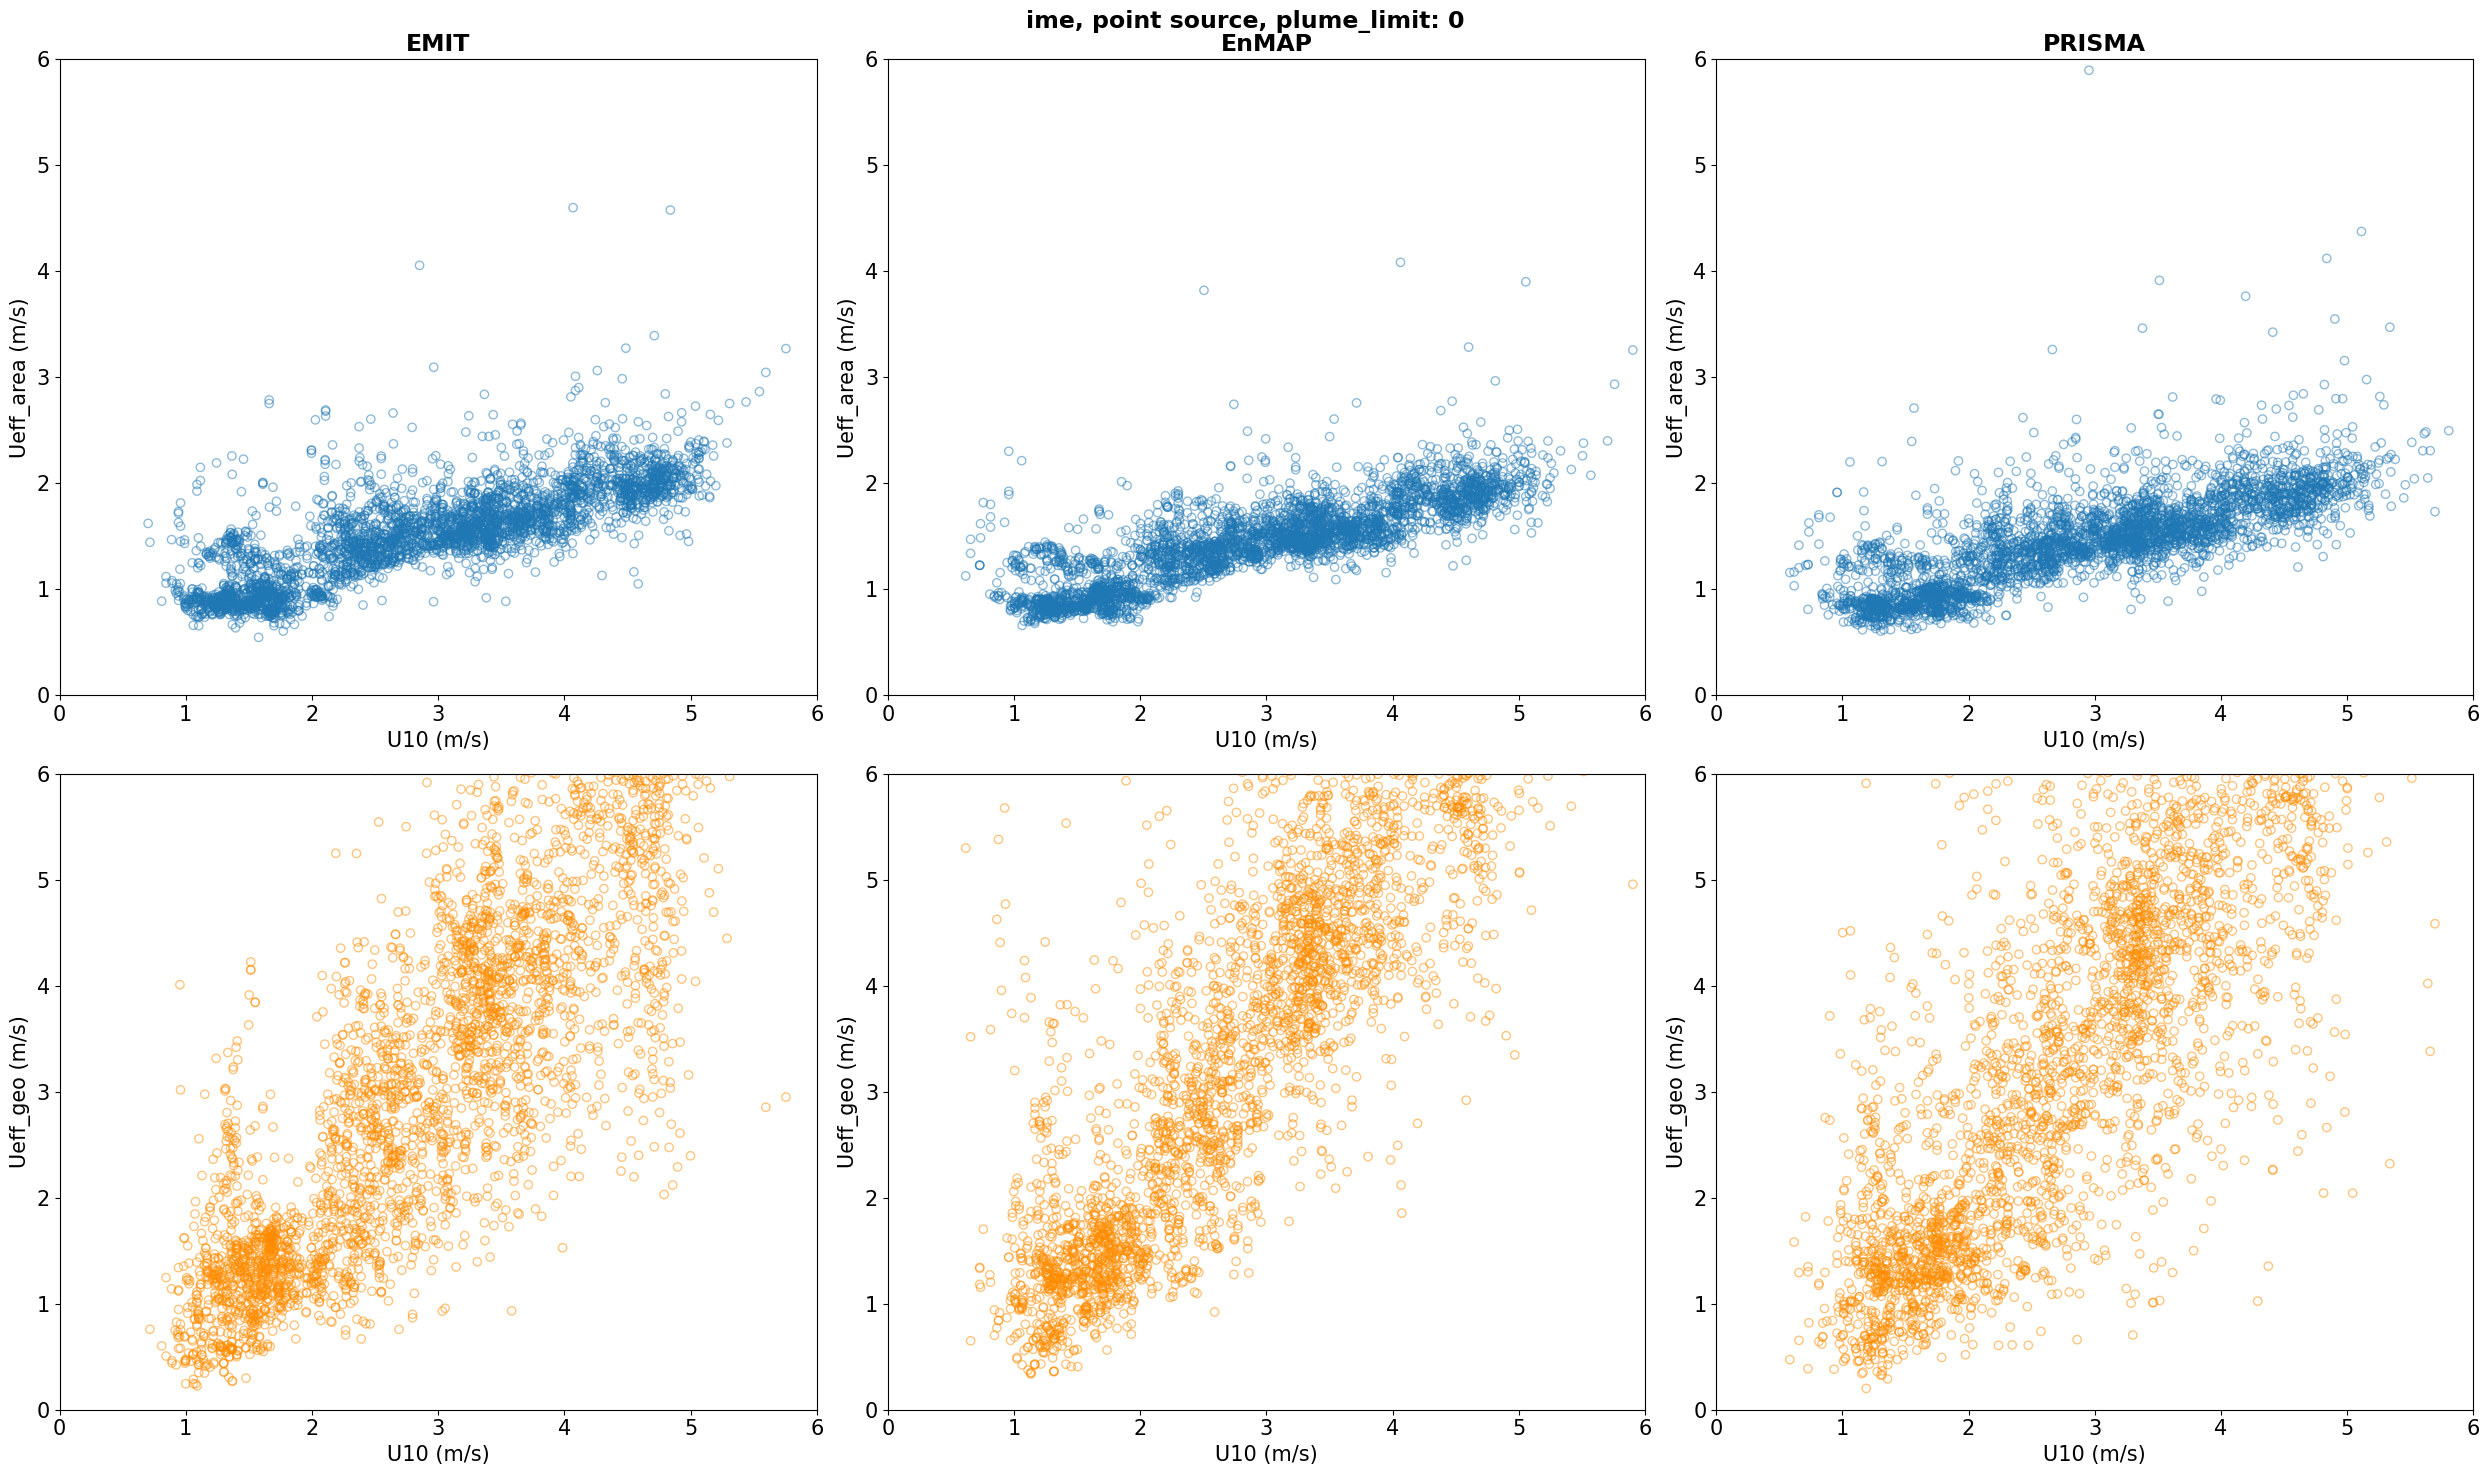

In [7]:
plot_ime(point_dir, emiss_type='point', plume_limit=0)

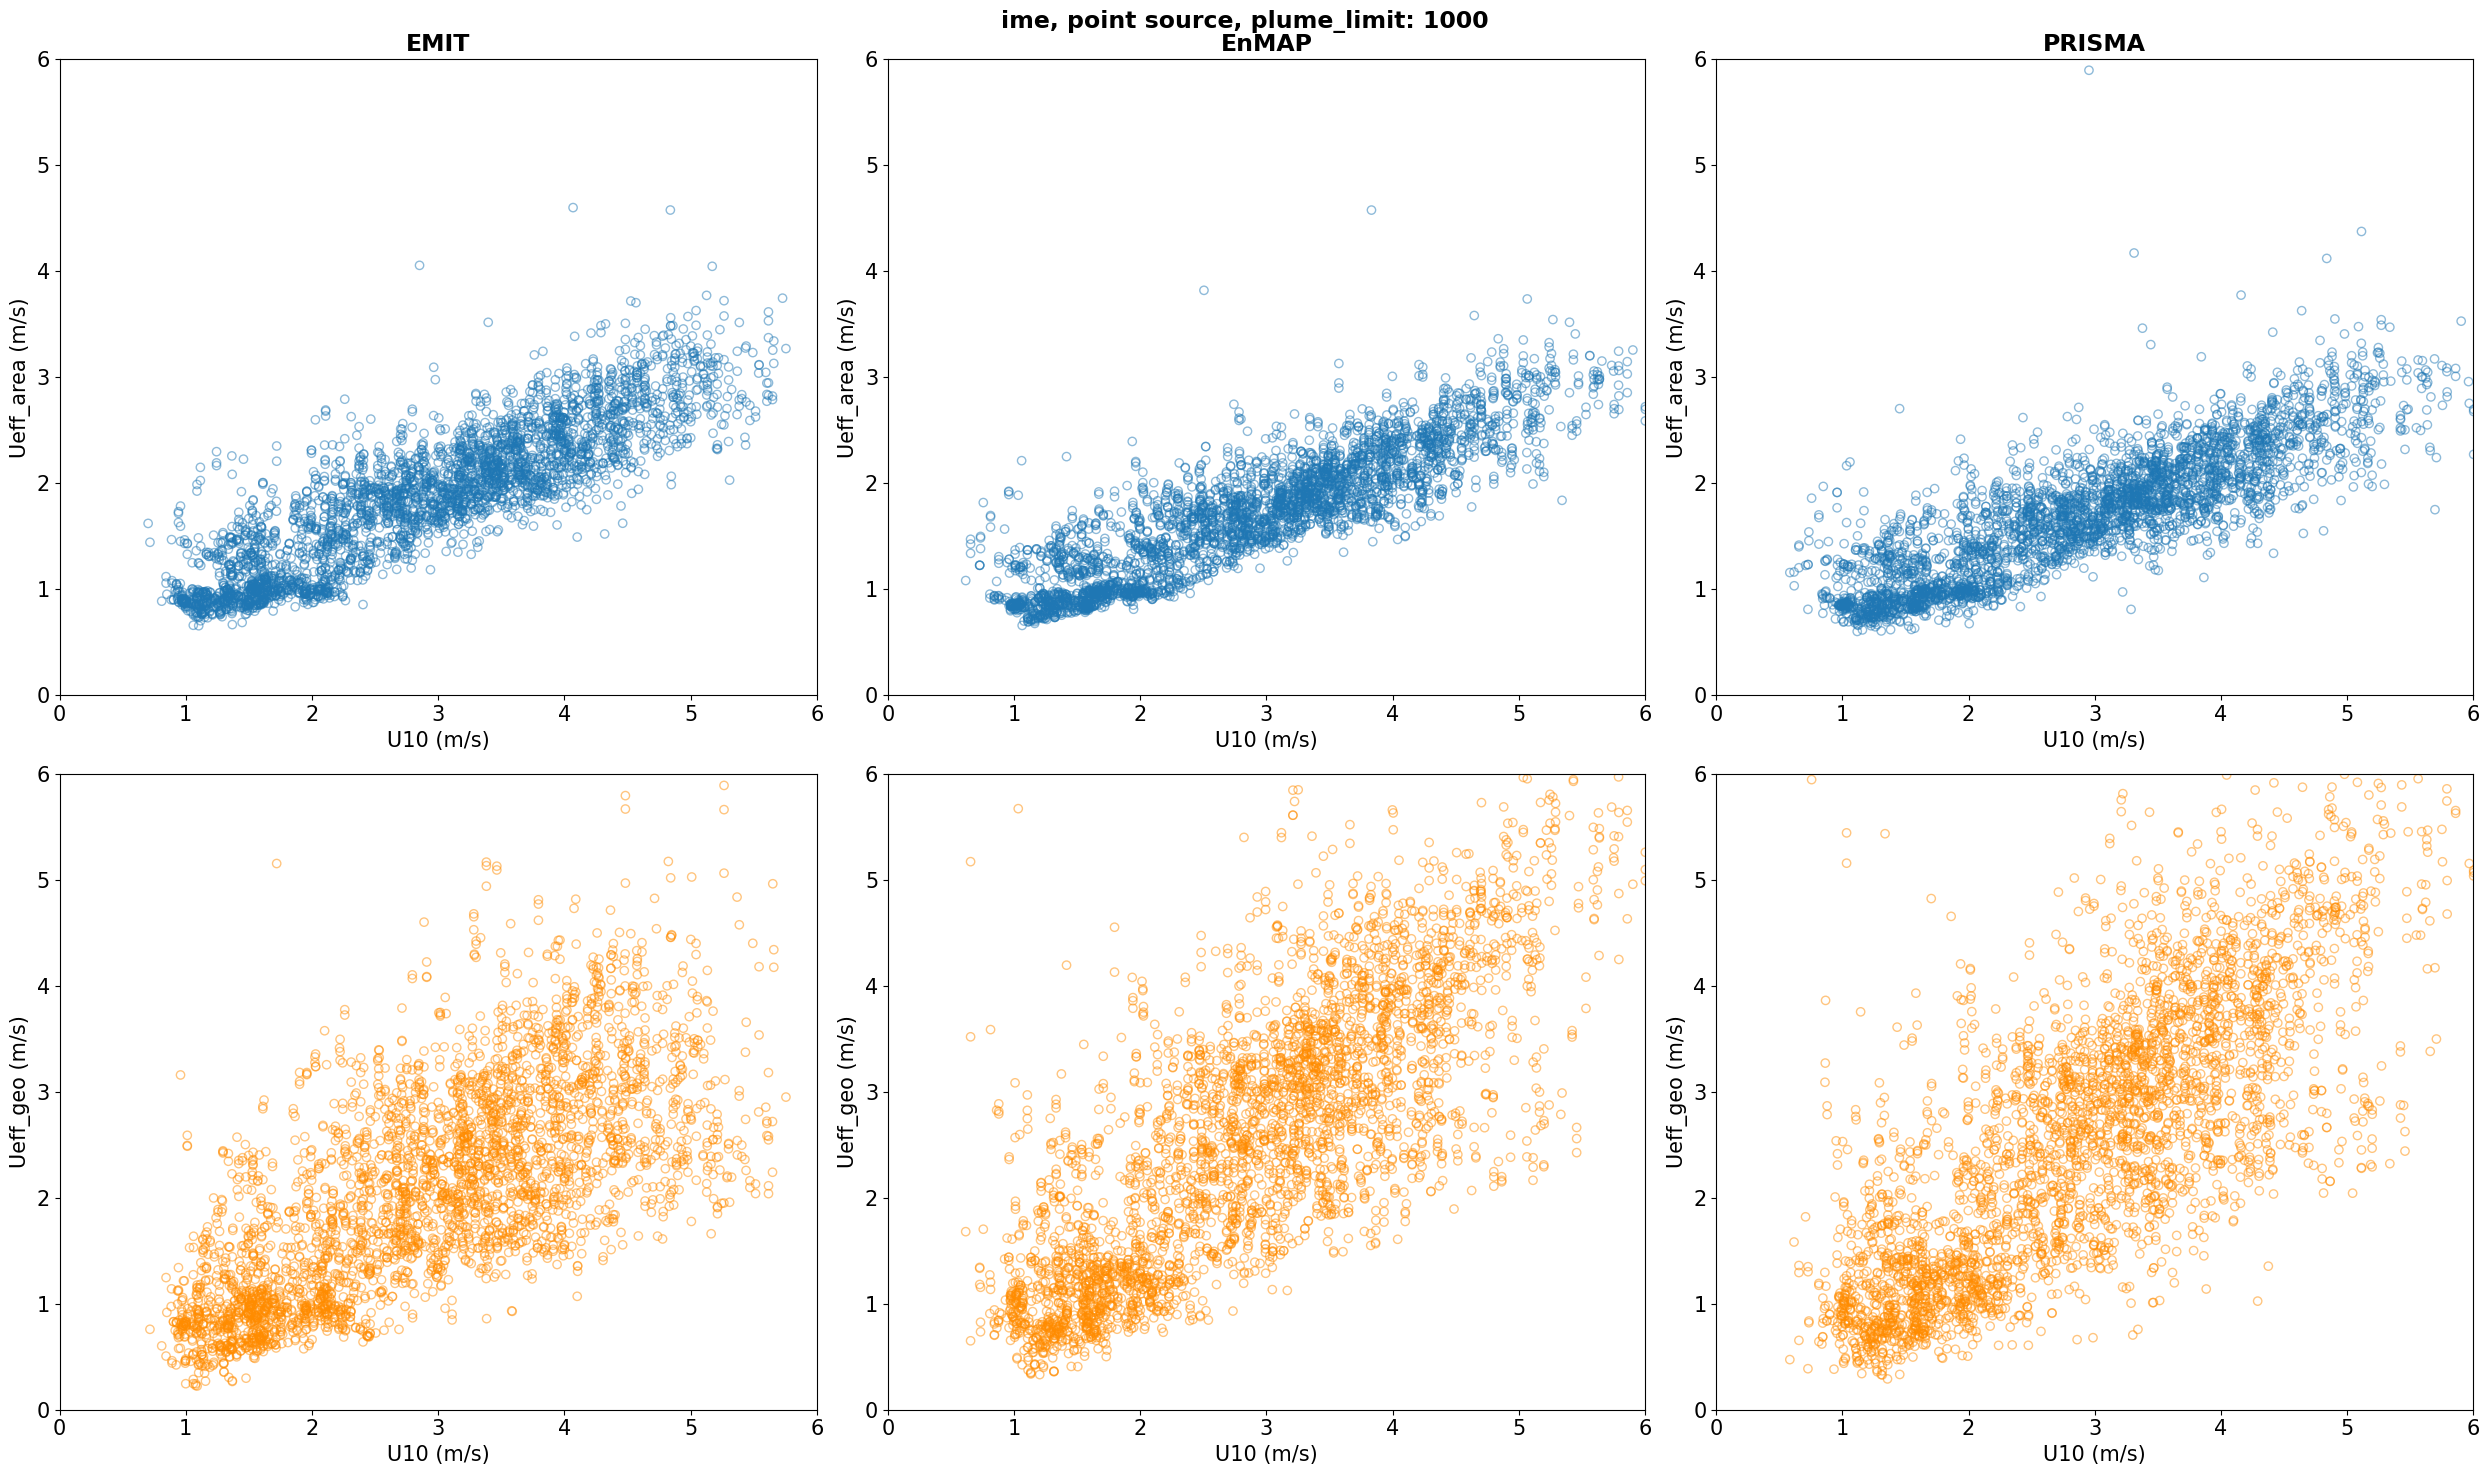

In [8]:
plot_ime(point_dir, emiss_type='point', plume_limit=1000)

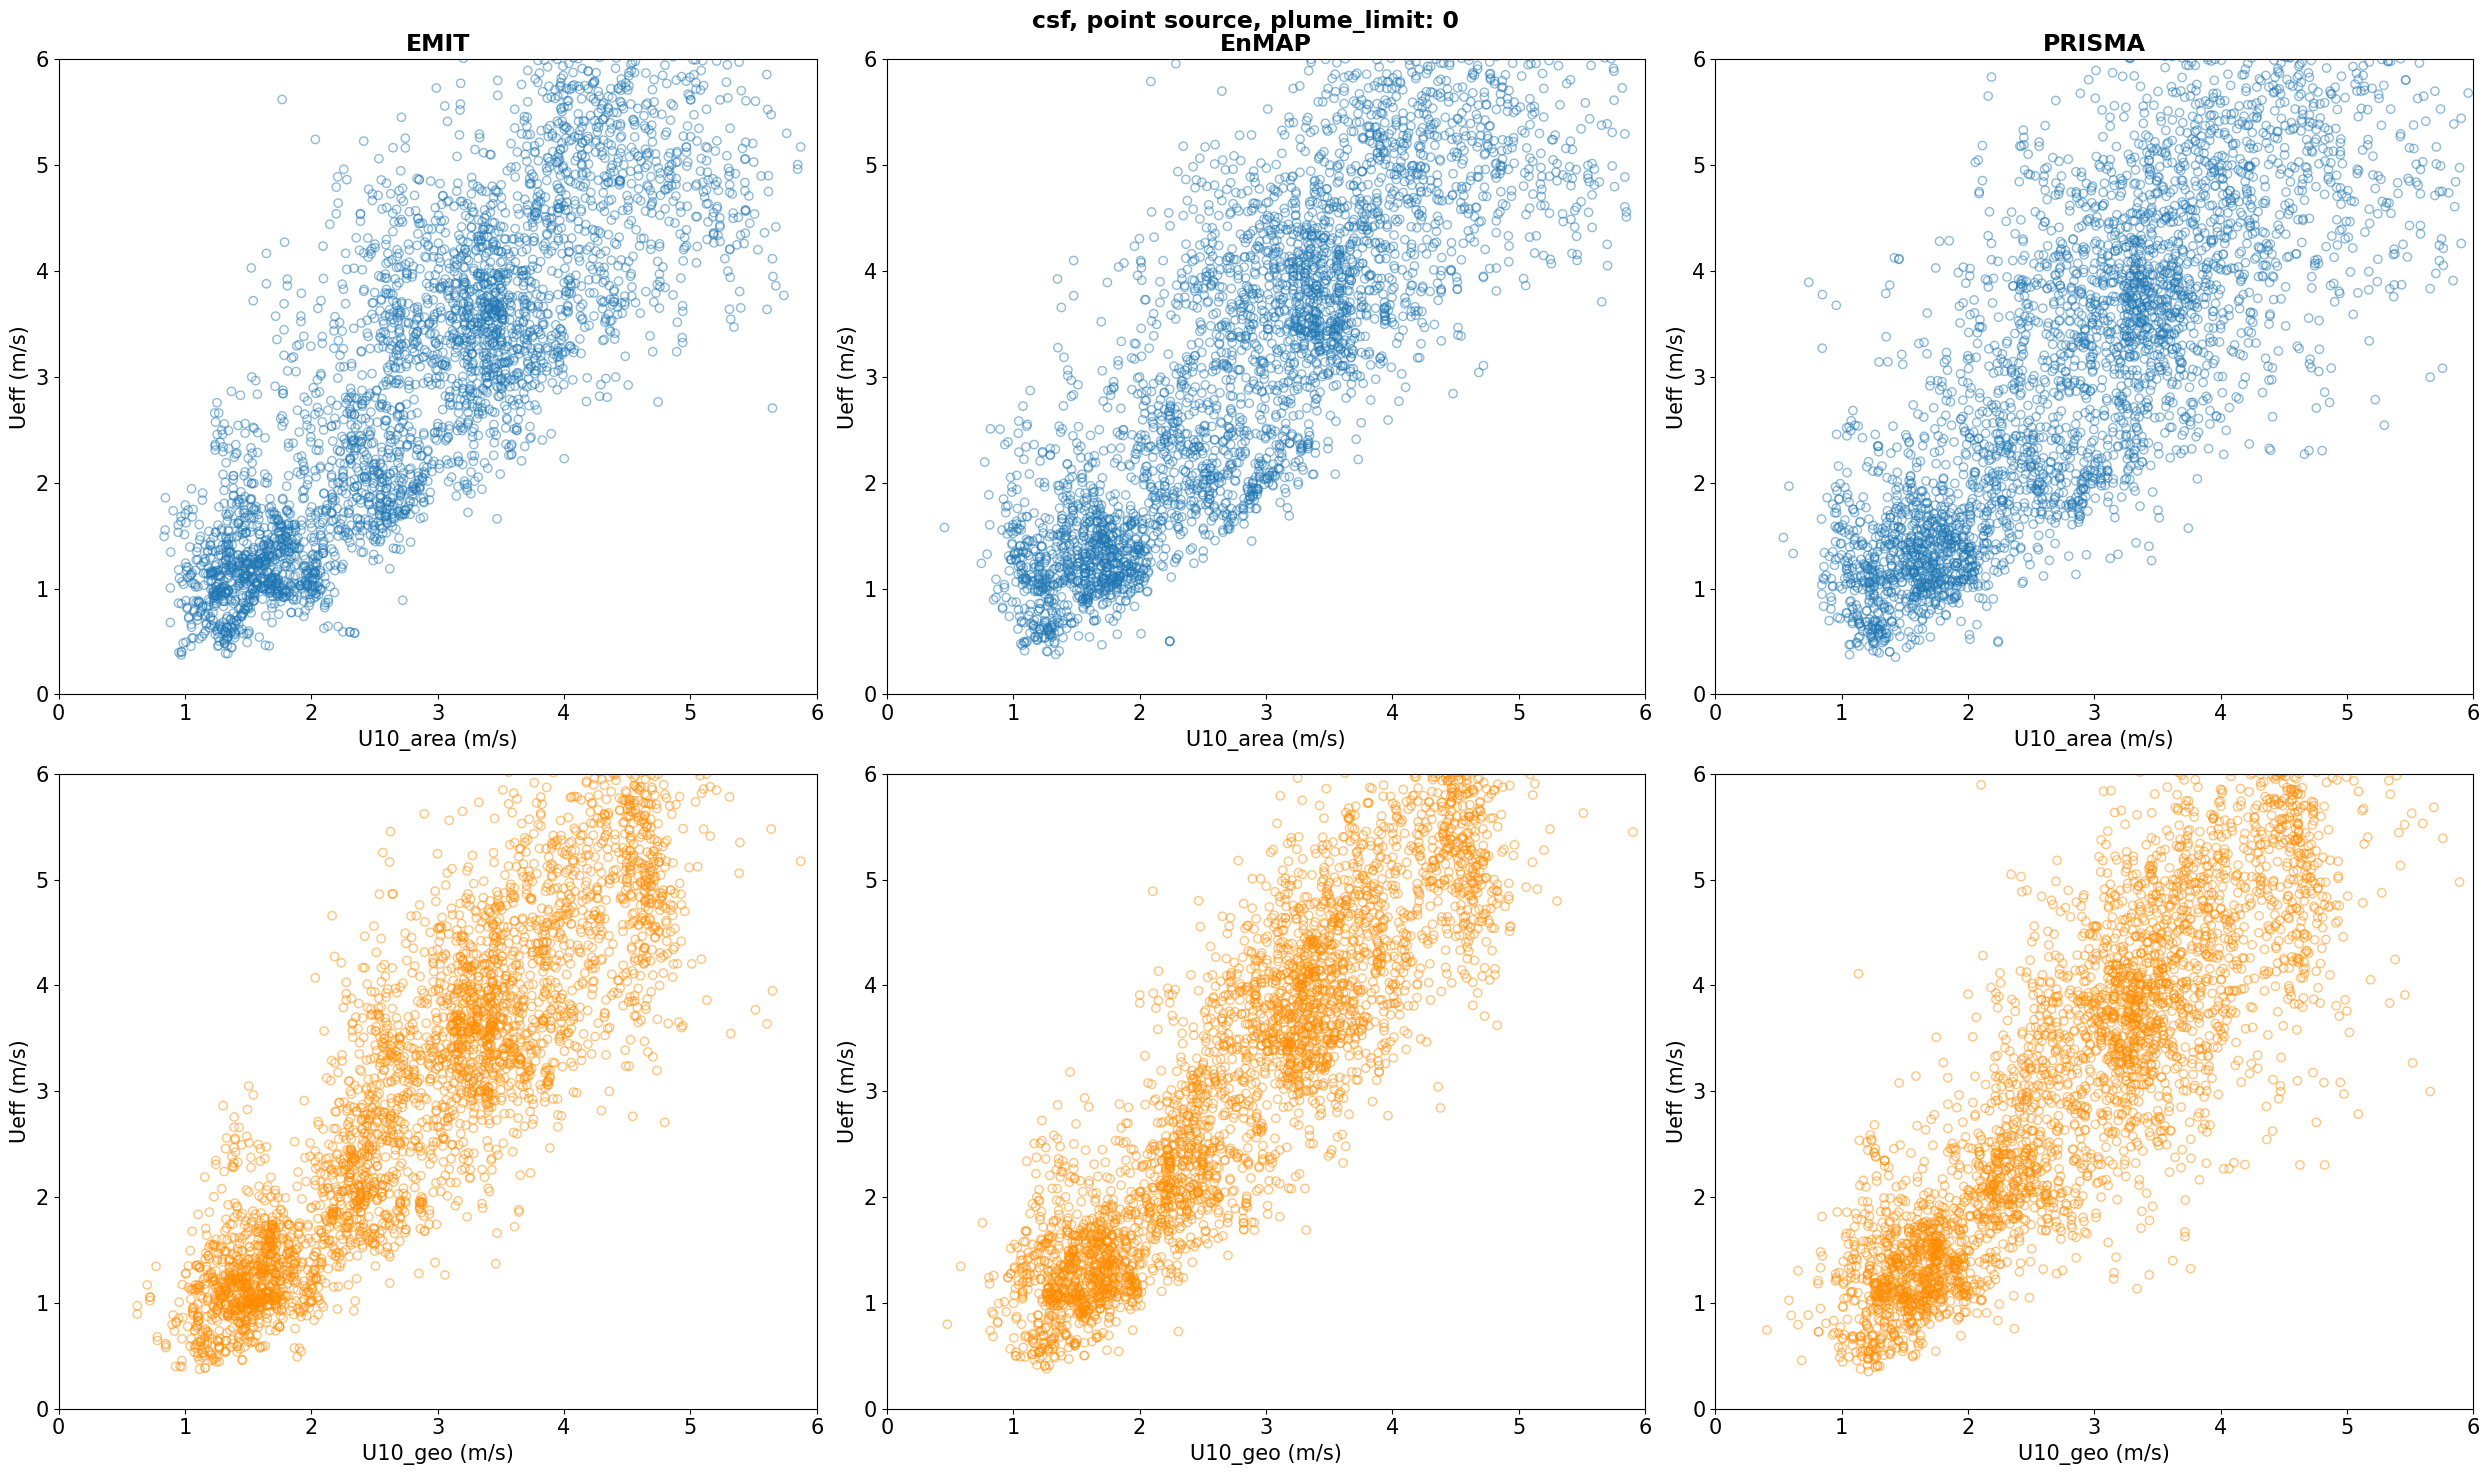

In [9]:
plot_csf(point_dir, emiss_type='point', plume_limit=0)

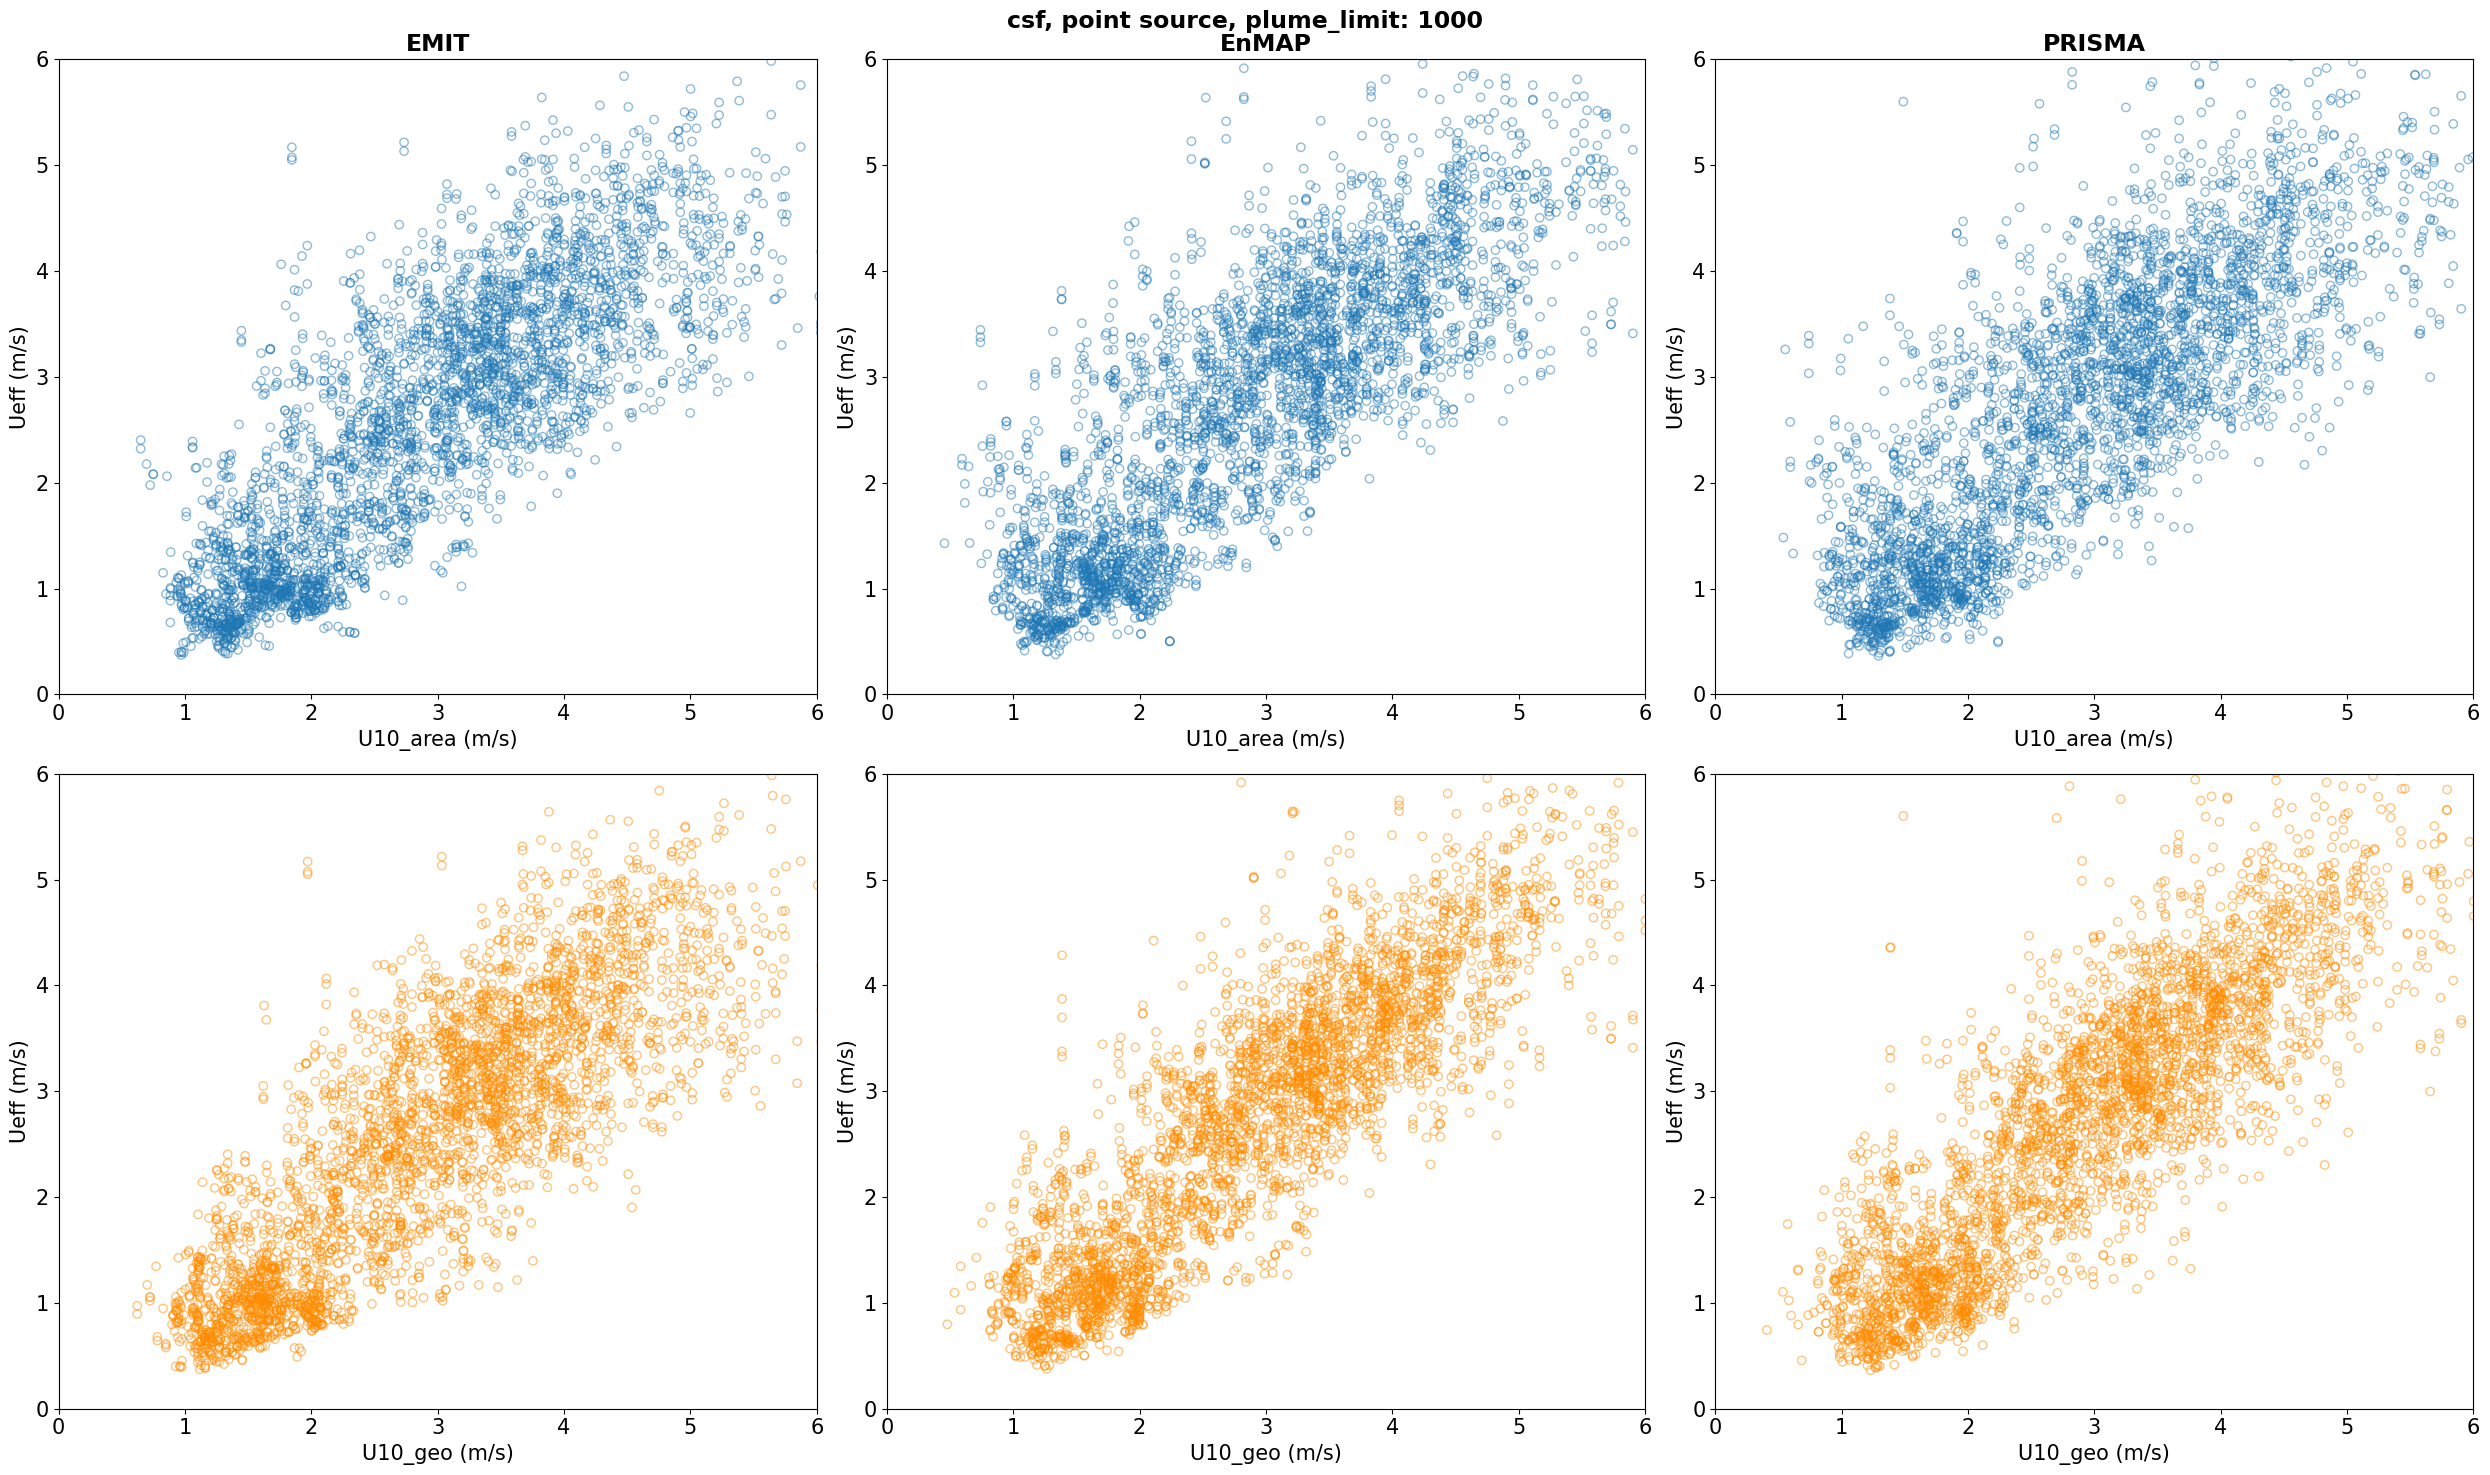

In [10]:
plot_csf(point_dir, emiss_type='point', plume_limit=1000)

## Ensemble calibration

In [11]:
def fit_line(x, y, fit_intercept=True, return_mask=False):
    from sklearn.linear_model import HuberRegressor, LinearRegression
    from sklearn.metrics import mean_squared_error
    # Reshape the arrays to 2D
    x_2d = x.reshape(-1, 1)
    y_2d = y.reshape(-1, 1)

    # # Create and fit the linear regression model
    # model = LinearRegression(fit_intercept=True)
    # model.fit(x_2d, y_2d)
    # # Get the slope of the linear regression line
    # slope = model.coef_[0][0]
    # intercept = model.intercept_[0]
    # # Calculate R-squared
    # r_squared = model.score(x_2d, y_2d)
    
    # Create the HuberRegressor
    huber = HuberRegressor(fit_intercept=fit_intercept)
    huber.fit(x_2d, y_2d)
    slope = huber.coef_[0]
    intercept = huber.intercept_


    # Calculate R-squared
    # r_squared = huber.score(x_2d, y_2d)
    
    r_squared = huber.score(x[~huber.outliers_].reshape(-1, 1), y[~huber.outliers_].reshape(-1, 1))

    mean_resid = np.mean(y - (slope*x+intercept))

    if return_mask:
        return slope, intercept, r_squared, mean_resid, ~huber.outliers_
    else:
        return slope, intercept, r_squared, mean_resid

In [12]:
def regression(x, y, fit_intercept):
    slope, intercept, r_squared, mean_resid = fit_line(x, y, fit_intercept)

    return pd.DataFrame({'slope': slope,
                         'intercept': intercept,
                         'r_squared': r_squared,
                         'mean_resid': mean_resid,
                        }, index=[0])

def regression_data(data_dir, emiss_type, fit_intercept=True, split=False, xname='u10_ime', yname='ueff_ime', wind='u10'):
    merge_list = []
    for mean_wspd_region in ['site', 'plume', 'domain']:
        for plume_limit in [0, 2500, 1000]:
            df_emit = ensemble_data('EMIT', data_dir, emiss_type=emiss_type, wind=wind)\
                            .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
            df_enmap = ensemble_data('EnMAP', data_dir, emiss_type=emiss_type, wind=wind)\
                            .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
            df_prisma = ensemble_data('PRISMA', data_dir, emiss_type=emiss_type, wind=wind)\
                            .query("(mean_wspd_region == @mean_wspd_region) & (plume_limit == @plume_limit)")
            
            if split:
                df_emit = df_emit[:len(df_emit)//2]
                df_enmap = df_enmap[:len(df_enmap)//2]
                df_prisma = df_prisma[:len(df_prisma)//2]

            df_emit = df_emit.dropna(subset=[xname])
            df_enmap = df_enmap.dropna(subset=[xname])
            df_prisma = df_prisma.dropna(subset=[xname])

            df_emit_regression = regression(df_emit[xname].values, df_emit[yname].values, fit_intercept)
            df_emit_regression['imager'] = 'EMIT'
            df_emit_regression['emiss_type'] = emiss_type
            df_emit_regression['plume_limit'] = plume_limit
            df_emit_regression['mean_wspd_region'] = mean_wspd_region

            df_enmap_regression = regression(df_enmap[xname].values, df_enmap[yname].values, fit_intercept)
            df_enmap_regression['imager'] = 'EnMAP'
            df_enmap_regression['emiss_type'] = emiss_type
            df_enmap_regression['plume_limit'] = plume_limit
            df_enmap_regression['mean_wspd_region'] = mean_wspd_region

            df_prisma_regression = regression(df_prisma[xname].values, df_prisma[yname].values, fit_intercept)
            df_prisma_regression['imager'] = 'PRISMA'
            df_prisma_regression['emiss_type'] = emiss_type
            df_prisma_regression['plume_limit'] = plume_limit
            df_prisma_regression['mean_wspd_region'] = mean_wspd_region

            merge_list.append(pd.concat([df_emit_regression, df_enmap_regression, df_prisma_regression]))
        
    return pd.concat(merge_list)[['imager', 'emiss_type', 'plume_limit', 'mean_wspd_region',
                         'slope', 'intercept', 'r_squared', 'mean_resid'
                        ]].round(2).sort_values(by=['imager', 'emiss_type', 'plume_limit'])

In [13]:
def plot_calib_simple(df, method='ime', emiss_type='point', simple_legend=True):
    df = df[(df['method'] == method) & (df['emiss_type'] == emiss_type)]
    method = method.upper()

    # Unique values
    imager_values = df['imager'].unique()
    mean_wspd_values = df['mean_wspd_region'].unique()
    # plume_limits = df['plume_limit'].unique()
    plume_limits = [0, 2500, 1000]

    # Define colors for plume_limit
    colors = {plume_limits[0]: 'tab:blue', plume_limits[1]: 'tab:green', plume_limits[2]: 'tab:orange'}

    # Define line styles for mean_wspd_region
    linestyles = {mean_wspd_values[0]: '-', mean_wspd_values[1]: 'dotted', mean_wspd_values[2]: 'dashed'}

    # Create a single-row subplot (1 row, 3 columns)
    if simple_legend:
        fig, axes = plt.subplots(1, len(imager_values), figsize=(10, 4), sharex=True, sharey=True)
    else:
        fig, axes = plt.subplots(1, len(imager_values), figsize=(24, 8), sharex=True, sharey=True)

    # Iterate over imagers (each column)
    for j, imager in enumerate(imager_values):
        ax = axes[j]
        subset = df[df['imager'] == imager]

        # Plot lines for each combination of plume_limit and mean_wspd_region
        for plume in plume_limits:
            for mean_wspd in mean_wspd_values:
                sub_sub = subset[(subset['mean_wspd_region'] == mean_wspd) & (subset['plume_limit'] == plume)]
                if not sub_sub.empty:
                    x = np.linspace(0, 10, 100)  # Define x range
                    slope, intercept = sub_sub['slope'].values[0], sub_sub['intercept'].values[0]
                    y = slope * x + intercept
                    if intercept != 0:
                        label = f"{plume} m, ({mean_wspd}): y={slope:.2f}x+{intercept:.2f}, R2={sub_sub['r_squared'].item()}"
                    else:
                        label = f"{plume} m, ({mean_wspd}): y={slope:.2f}x, R2={sub_sub['r_squared'].item()}"
                        
                    ax.plot(x, y, 
                            color=colors[plume], 
                            linestyle=linestyles[mean_wspd], 
                            label=label,
                           )
        ax.axline((0, 0), slope=1, c='k', label='1:1 line')
        ax.set_xlim(0, 5)
        ax.set_ylim(0, 5)
        ax.set_title(f"{method}, {imager}, {emiss_type}", fontweight='bold')
        if not simple_legend:
            ax.legend()

    if simple_legend:
        # Create a single legend on the right
        legend_handles = []
        for plume in plume_limits:
            for mean_wspd in mean_wspd_values:
                line = mlines.Line2D([], [], color=colors[plume], linestyle=linestyles[mean_wspd], label=f"{plume} m ({mean_wspd})")
                legend_handles.append(line)

        fig.legend(handles=legend_handles, loc="center left", bbox_to_anchor=(1, 0.5))
    
    fig.tight_layout()

In [14]:
df_point_calib_ime = regression_data(point_dir, emiss_type='point', fit_intercept=True, xname='u10_ime', yname='ueff_ime', split=False)
df_point_calib_csf = regression_data(point_dir, emiss_type='point', fit_intercept=True, xname='u10_geo_csf', yname='ueff_csf', split=False)
# df_area_calib_ime = regression_data(area_dir, emiss_type='area', fit_intercept=True, xname='u10_ime', yname='ueff_ime', split=False)
# df_area_calib_csf = regression_data(area_dir, emiss_type='area', fit_intercept=True, xname='u10_geo_csf', yname='ueff_csf', split=False)
df_point_calib_ime['method'] = 'ime'
# df_area_calib_ime['method'] = 'ime'
df_point_calib_csf['method'] = 'csf'
# df_area_calib_csf['method'] = 'csf'
# df_calib = pd.concat([df_point_calib_ime, df_point_calib_csf, df_area_calib_ime, df_area_calib_csf])
df_calib = pd.concat([df_point_calib_ime, df_point_calib_csf])

df_point_calib_ime_nointercept = regression_data(point_dir, emiss_type='point', fit_intercept=False, xname='u10_ime', yname='ueff_ime', split=False)
df_point_calib_csf_nointercept = regression_data(point_dir, emiss_type='point', fit_intercept=False, xname='u10_geo_csf', yname='ueff_csf', split=False)
# df_area_calib_ime_nointercept = regression_data(area_dir, emiss_type='area', fit_intercept=False, xname='u10_ime', yname='ueff_ime', split=False)
# df_area_calib_csf_nointercept = regression_data(area_dir, emiss_type='area', fit_intercept=False, xname='u10_geo_csf', yname='ueff_csf', split=False)
df_point_calib_ime_nointercept['method'] = 'ime'
# df_area_calib_ime_nointercept['method'] = 'ime'
df_point_calib_csf_nointercept['method'] = 'csf'
# df_area_calib_csf_nointercept['method'] = 'csf'
# df_calib_nointercept = pd.concat([df_point_calib_ime_nointercept, df_point_calib_csf_nointercept, df_area_calib_ime_nointercept, df_area_calib_csf_nointercept])
df_calib_nointercept = pd.concat([df_point_calib_ime_nointercept, df_point_calib_csf_nointercept])

In [15]:
df_calib_nointercept

imager emiss_type  plume_limit mean_wspd_region  slope  intercept  \
0    EMIT      point            0             site   0.49        0.0   
0    EMIT      point            0            plume   0.48        0.0   
0    EMIT      point            0           domain   0.47        0.0   
0    EMIT      point         1000             site   0.62        0.0   
0    EMIT      point         1000            plume   0.63        0.0   
0    EMIT      point         1000           domain   0.60        0.0   
0    EMIT      point         2500             site   0.54        0.0   
0    EMIT      point         2500            plume   0.53        0.0   
0    EMIT      point         2500           domain   0.52        0.0   
0   EnMAP      point            0             site   0.46        0.0   
0   EnMAP      point            0            plume   0.45        0.0   
0   EnMAP      point            0           domain   0.45        0.0   
0   EnMAP      point         1000             site   0.57        0.0   
0   EnMAP      point         1000            plume   0.57        0.0   
0   EnMAP      point         1000           domain   0.55        0.0   
0   EnMAP      point         2500             site   0.50        0.0   
0   EnMAP      point         2500            plume   0.50        0.0   
0   EnMAP      point         2500           domain   0.49        0.0   
0  PRISMA      point            0             site   0.46        0.0   
0  PRISMA      point            0            plume   0.46        0.0   
0  PRISMA      point            0           domain   0.45        0.0   
0  PRISMA      point         1000             site   0.56        0.0   
0  PRISMA      point         1000            plume   0.57        0.0   
0  PRISMA      point         1000           domain   0.54        0.0   
0  PRISMA      point         2500             site   0.50        0.0   
0  PRISMA      point         2500            plume   0.50        0.0   
0  PRISMA      point         2500           domain   0.49        0.0   
0    EMIT      point            0             site   1.08        0.0   
0    EMIT      point            0            plume   1.07        0.0   
0    EMIT      point            0           domain   1.10        0.0   
0    EMIT      point         1000             site   0.88        0.0   
0    EMIT      point         1000            plume   0.91        0.0   
0    EMIT      point         1000           domain   0.85        0.0   
0    EMIT      point         2500             site   1.02        0.0   
0    EMIT      point         2500            plume   1.02        0.0   
0    EMIT      point         2500           domain   0.99        0.0   
0   EnMAP      point            0             site   1.15        0.0   
0   EnMAP      point            0            plume   1.13        0.0   
0   EnMAP      point            0           domain   1.15        0.0   
0   EnMAP      point         1000             site   0.94        0.0   
0   EnMAP      point         1000            plume   0.95        0.0   
0   EnMAP      point         1000           domain   0.90        0.0   
0   EnMAP      point         2500             site   1.05        0.0   
0   EnMAP      point         2500            plume   1.04        0.0   
0   EnMAP      point         2500           domain   1.02        0.0   
0  PRISMA      point            0             site   1.13        0.0   
0  PRISMA      point            0            plume   1.12        0.0   
0  PRISMA      point            0           domain   1.13        0.0   
0  PRISMA      point         1000             site   0.93        0.0   
0  PRISMA      point         1000            plume   0.94        0.0   
0  PRISMA      point         1000           domain   0.89        0.0   
0  PRISMA      point         2500             site   1.04        0.0   
0  PRISMA      point         2500            plume   1.04        0.0   
0  PRISMA      point         2500           domain   1.01        0.0   

   r_squared  mean_resid method  
0       

In [16]:
df_calib_table = df_calib.query("(method == 'ime') & (mean_wspd_region == 'domain') & (plume_limit == 0)")[['method','imager','emiss_type','slope','intercept','r_squared']]

In [17]:
print(df_calib_table.to_latex(index=False, float_format=lambda x: '%10.2f' % x))

\begin{tabular}{lllrrr}
\toprule
method & imager & emiss_type & slope & intercept & r_squared \\
\midrule
ime & EMIT & point &       0.34 &       0.44 &       0.94 \\
ime & EnMAP & point &       0.31 &       0.46 &       0.94 \\
ime & PRISMA & point &       0.32 &       0.44 &       0.94 \\
\bottomrule
\end{tabular}



In [18]:
df_calib_nointercept_table = df_calib_nointercept.query("(method == 'csf') & (mean_wspd_region == 'domain') & (plume_limit == 0)")[['method','imager','emiss_type','slope','intercept','r_squared']]

In [19]:
print(df_calib_nointercept_table.to_latex(index=False, float_format=lambda x: '%10.2f' % x))

\begin{tabular}{lllrrr}
\toprule
method & imager & emiss_type & slope & intercept & r_squared \\
\midrule
csf & EMIT & point &       1.10 &       0.00 &       0.90 \\
csf & EnMAP & point &       1.15 &       0.00 &       0.90 \\
csf & PRISMA & point &       1.13 &       0.00 &       0.88 \\
\bottomrule
\end{tabular}



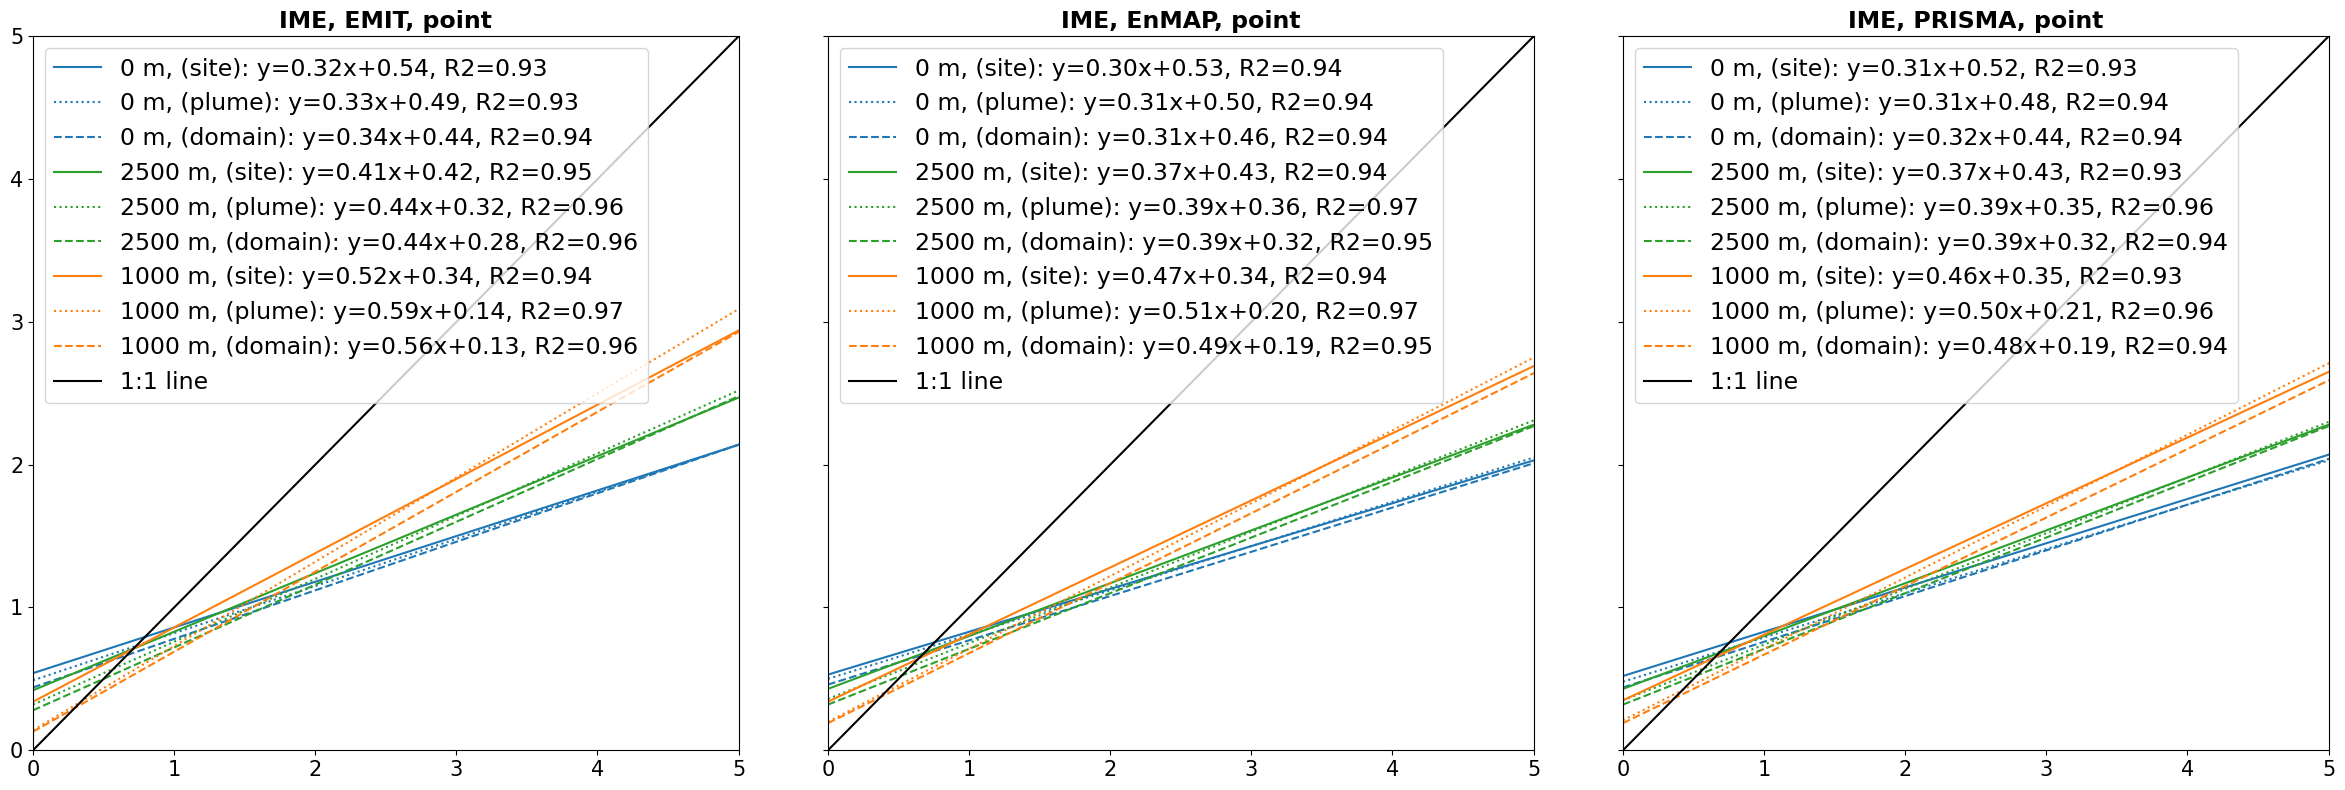

In [20]:
plot_calib_simple(df_calib, method='ime', emiss_type='point', simple_legend=False)

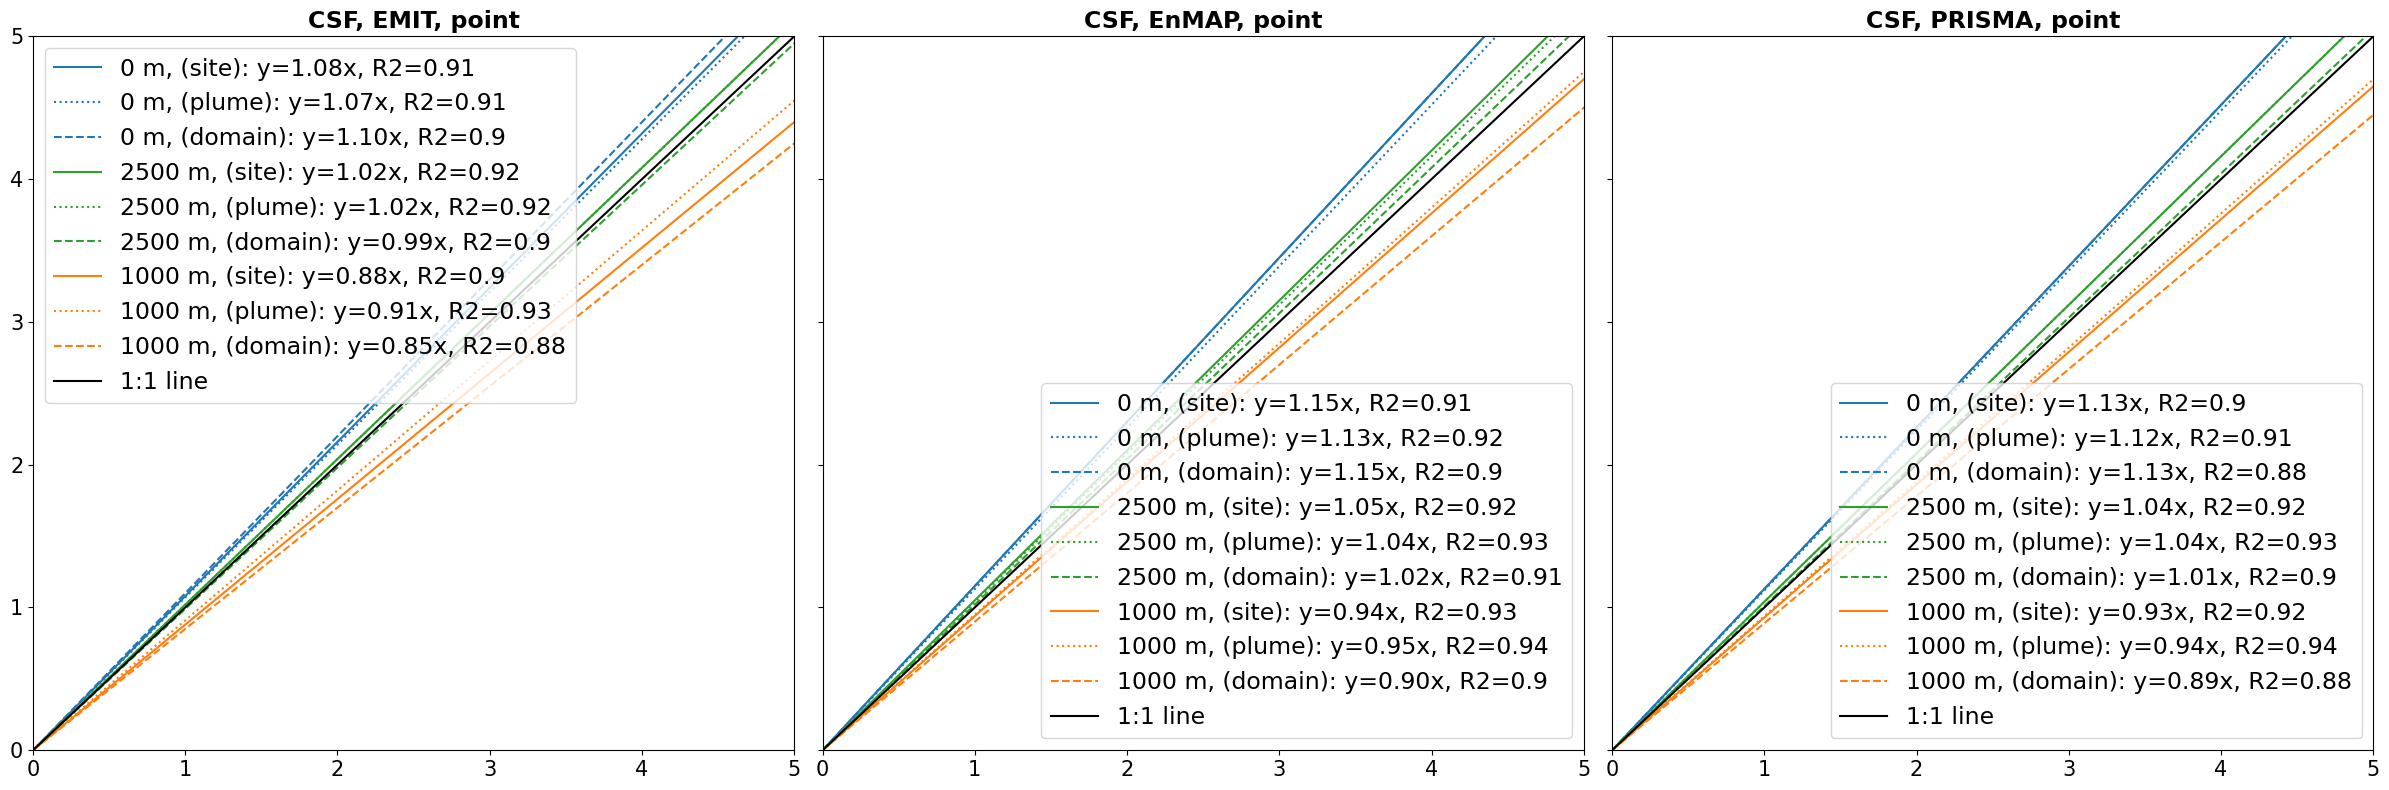

In [21]:
plot_calib_simple(df_calib_nointercept, method='csf', emiss_type='point', simple_legend=False)

## Summary

In [22]:
df_calib_ime_domain = df_calib.query("(method == 'ime') & (mean_wspd_region == 'domain') & (emiss_type == 'point')")
df_calib_nointercept_csf_domain = df_calib_nointercept.query("(method == 'csf') & (mean_wspd_region == 'domain') & (emiss_type == 'point')")

In [23]:
df_summary = pd.concat([df_calib_ime_domain, df_calib_nointercept_csf_domain])

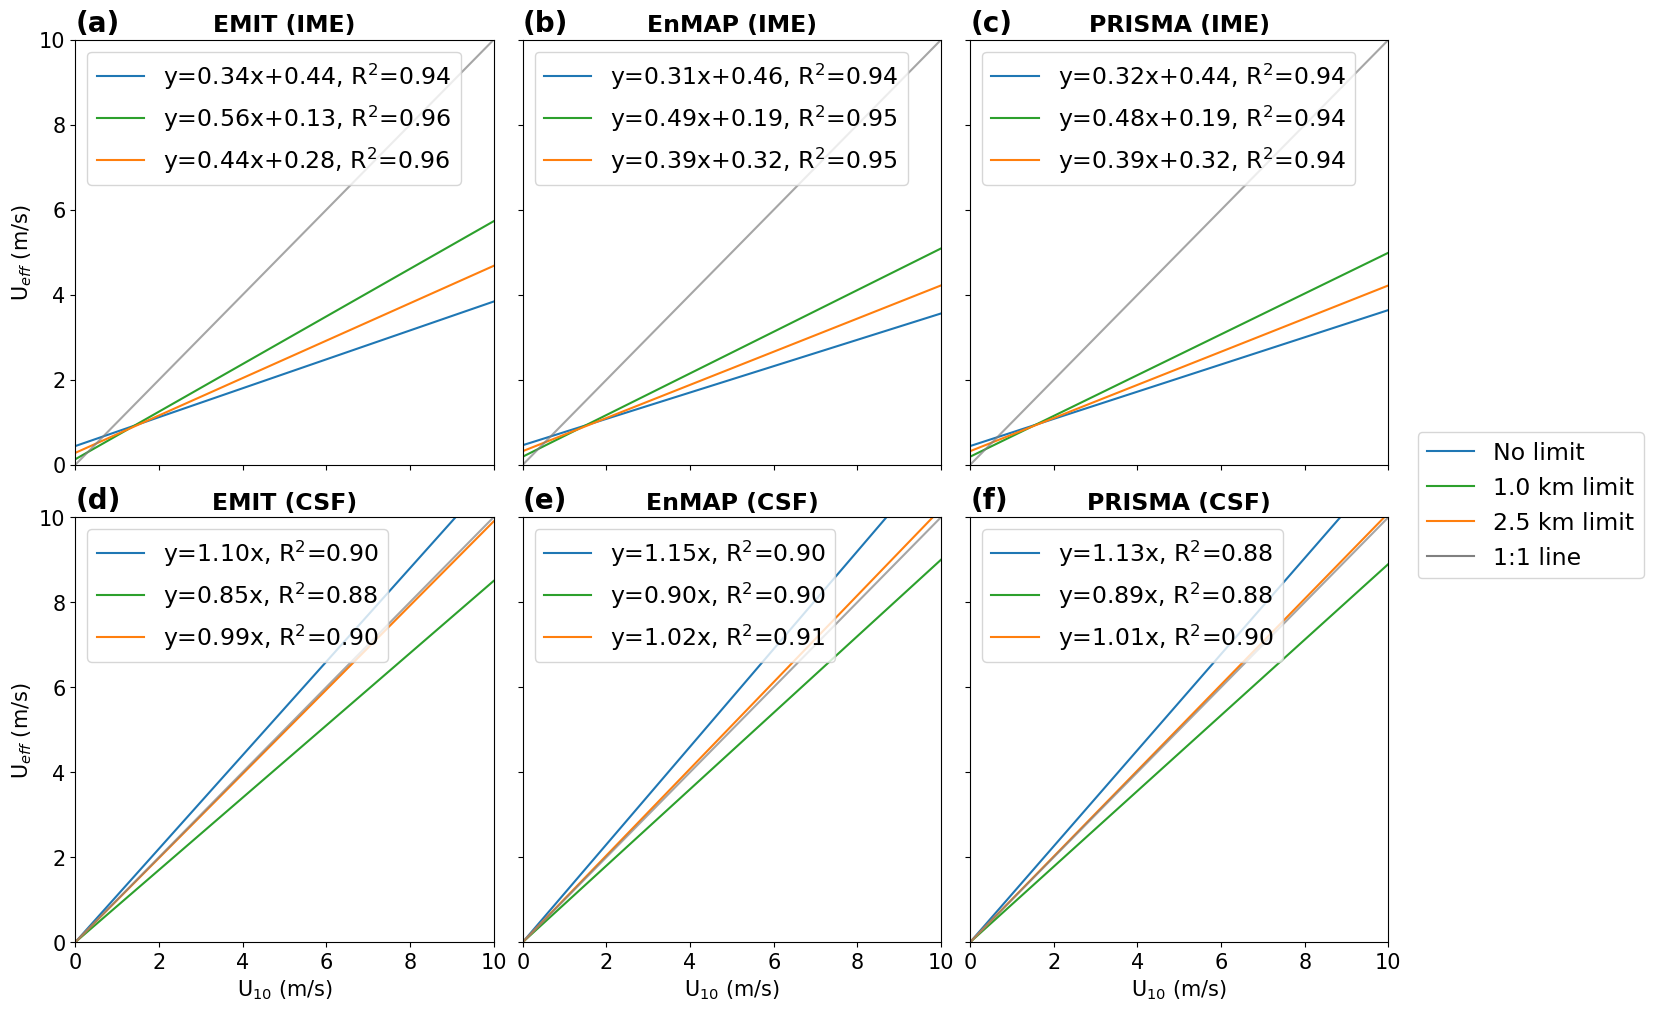

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 10), sharex=True, sharey=True, constrained_layout=True)

# Unique values
method_values = df_summary['method'].unique()
imager_values = df_summary['imager'].unique()
plume_limits = df_summary['plume_limit'].unique()
# plume_limits = [0, 2500, 1000]

# Define colors for plume_limit
colors = {plume_limits[0]: 'tab:blue', plume_limits[1]: 'tab:green', plume_limits[2]: 'tab:orange'}

# Iterate over imagers (each column)
for j, imager in enumerate(imager_values):
    for i, method in enumerate(method_values):
        ax = axs[i, j]
        subset = df_summary[(df_summary['imager'] == imager) & (df_summary['method'] == method)]
    
        # Plot lines for each combination of plume_limit and mean_wspd_region
        for plume in plume_limits:
            sub_sub = subset[(subset['plume_limit'] == plume)]
            if not sub_sub.empty:
                x = np.linspace(0, 10, 100)  # Define x range
                slope, intercept = sub_sub['slope'].values[0], sub_sub['intercept'].values[0]
                y = slope * x + intercept
                if intercept != 0:
                    label = f"y={slope:.2f}x+{intercept:.2f}, R$^2$={sub_sub['r_squared'].item():.2f}"
                else:
                    label = f"y={slope:.2f}x, R$^2$={sub_sub['r_squared'].item():.2f}"
                    
                ax.plot(x, y, 
                        color=colors[plume], 
                        label=label,
                       )
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        ax.legend(loc='upper left')
        ax.axline((0, 0), slope=1, c='gray', label='1:1 line', alpha=0.7)

        ax.set_title(f"{imager} ({method.upper()})", fontweight='bold')

# Create a single legend on the right
legend_handles = []
for plume in plume_limits:
    if plume == 0:
        label = 'No limit'
    else:
        label = f"{plume/1000:.1f} km limit"
    line = mlines.Line2D([], [], color=colors[plume], label=label)
    legend_handles.append(line)
legend_handles.append(mlines.Line2D([], [], color='gray', label='1:1 line'))

fig.legend(handles=legend_handles, loc="center left", bbox_to_anchor=(1, 0.5))

for ax in axs[1, :]:
    ax.set_xlabel('U$_{10}$ (m/s)')

for ax in axs[:, 0]:
    ax.set_ylabel('U$_{eff}$ (m/s)')

for n, ax in enumerate(axs.flatten()):
    ax.text(0, 1.02, '({})'.format(string.ascii_lowercase[n]),
            transform=ax.transAxes, 
            size=20, weight='bold')
    
fig.savefig('../figures/ime_csf_calib_limit_co2.pdf', bbox_inches='tight')